# Deep ART

This file is an implementation of Sasha Petrenko's Deep ART neural network architecture.

## Summary

- Document: Deep ART
- Author: Sasha Petrenko
- Date 12/19/2023

## Description

This document outlines a series of experiments that aim to implement ART-like dynamics in a multilayer network.
This is done one step at a time, beginning with a supervised instar network to an unsupervised multilayer network.


# Setup

## Imports and Environment

First, we must load the necessary Python libraries.
While we're at it, we will setup the environment, such as pointing to our data directory.

In [ ]:
# Include tensorflow namespaces
import tensorflow as tf
import tensorflow_datasets as tfds

# Import some tf keras names directly for conciseness
from tensorflow.python.keras.layers import Input, Dense, Flatten
from tensorflow.python.keras.models import Model
# from tensorflow.python.keras.utils import plot_model
from tensorflow.keras.utils import plot_model

import tensorflow.keras as keras

# Progress bars for the notebook environment
from tqdm.notebook import tqdm, trange

# Numerical computing, matrices, etc.
import numpy as np

# Plotting utilitices
from matplotlib import pyplot as plt

# Inline plotting for notebooks
%matplotlib inline

# Standardized path utilities
from pathlib import Path

# Check the tensorflow version
print(tf.__version__)

2.15.0


### Configuration

Now we will setup the configuration of this particular notebook, such as file and plotting settings.

> **_NOTE:_** The `topdir` variable points to where you want the results saved. It is currently pointing to where the personal Google Drive gets mounted (if you click on the folder icon on the left and click the "mount drive" button). Change the path in `topdir` with the syntax used below (comma-separated directories) to where you want it to go.

In [ ]:
# Set the top data directory
# topdir = Path("drive", "MyDrive", "colab", "SysE5211")
# NOTE: comment the above and uncomment below for saving "locally" in the instance, which gets periodically deleted.
# topdir = Path("project")
topdir = Path("project")

# Create the results directories
resultsdir = topdir.joinpath("results")
resultsdir.mkdir(parents=True, exist_ok=True)

# Set the random seed for reproducibility
tf.random.set_seed(1234)

# Set the plotting dots-per-inch
dpi = 150

## Data Setup

Next, we will load and normalize the MNIST handwritten digit data.

In [ ]:
# Point to the image dimension
dim = 28

# Use the tensorflow data utilities library to load the MNIST handwritten digit dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Normalize images from a `uint8` in [0, 255] to `float32` in [0, 1]
def normalize_img(image, label):
    return tf.cast(tf.reshape(image,[dim**2]), tf.float32) / 255., label

# Apply the normalization to the full dataset
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# Cache the dataset in RAM for fast loading
ds_train = ds_train.cache()
# Stuffle the data
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# Group the data in batches
ds_train = ds_train.batch(128)
# Perform some more tensorflow dataset magic that apparently speeds things up
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Do the same as above on the test dataset
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers

keras.backend.clear_session()
N_HIDDEN = 10
N_COLUMNS = 3

class M:
    def __init__(self):
        self.columns = []
        self.inputs = []
        self.outputs = []

        # Input
        self.append_cs(784 + N_HIDDEN * 3)
        # T
        self.append_cs(N_HIDDEN * 4)
        # Hidden
        for ix in range(N_COLUMNS):
            self.append_cs(N_HIDDEN * 4)

        for ix in range(N_COLUMNS):
            print(self.columns[ix].summary())

        return

    # previous, self, next, T
    def get_column(self, input_shape: int):
        inputs = keras.Input(shape=(input_shape,))
        outputs = keras.layers.Dense(N_HIDDEN)(inputs)
        return keras.Model(inputs, outputs)

    def append_cs(self, local_dim):
        self.columns.append(self.get_column(local_dim))
        self.inputs.append(np.zeros(local_dim))
        self.outputs.append(np.zeros(local_dim))
        return

    def forward(self, input):
        for ix in range(len(self.columns)):
            # Input
            if ix == 0:
                # local_input = np.concatenate(input,)
                # s[ix][0:len(input)] = input
                self.inputs[ix][0:len(input)] = input
                self.outputs[ix] = self.columns[ix](self.inputs[ix])
            # T
            elif ix == 1:

                pass
        return

# def get_model():
#     columns = []
#     states = []
#     # Input
#     append_cs(columns, states, 784 + N_HIDDEN * 3)
#     # T
#     append_cs(columns, states, N_HIDDEN * 4)
#     # Hidden
#     for ix in range(N_COLUMNS):
#         # columns.append(get_column(N_HIDDEN * 4))
#         append_cs(columns, states, N_HIDDEN * 4)

#     for ix in range(N_COLUMNS):
#         print(columns[ix].summary())

#     return columns

# def forward(m: list, s: list, input):
#     # states = []
#     for ix in range(len(m)):
#         # Input
#         if ix == 0:
#             # local_input = np.concatenate(input,)
#             # s[ix][0:len(input)] = input
#             s[ix] = m[ix]()
#         # T
#         elif ix == 1:

#     return

# m = get_model()
m = M()
# m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 814)]             0         
                                                                 
 dense (Dense)               (None, 10)                8150      
                                                                 
Total params: 8150 (31.84 KB)
Trainable params: 8150 (31.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense_1 (Dense)             (None, 10)                410       
                                                                 
Total

In [ ]:
a = np.zeros(10)
a
b = np.ones(5)

a[0:5] = b
a

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

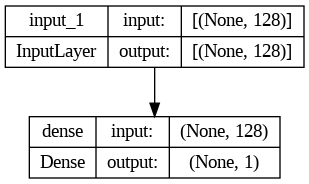

In [ ]:
# keras.utils.plot_model(
#     m,
#     "asdf.png",
#     show_shapes=True,
# )

In [ ]:
# class Hebbian(Layer):
class Hebbian(tf.keras.layers.Layer):

    def __init__(self, output_dim, lmbda=1.0, eta=0.0005, connectivity='random', connectivity_prob=0.25, **kwargs):
        '''
        Constructor for the Hebbian learning layer.

        args:
            output_dim - The shape of the output / activations computed by the layer.
            lambda - A floating-point valued parameter governing the strength of the Hebbian learning activation.
            eta - A floating-point valued parameter governing the Hebbian learning rate.
            connectivity - A string which determines the way in which the neurons in this layer are connected to
                the neurons in the previous layer.
        '''
        self.output_dim = output_dim
        self.lmbda = lmbda
        self.eta = eta
        self.connectivity = connectivity
        self.connectivity_prob = connectivity_prob

        super(Hebbian, self).__init__(**kwargs)

    def random_conn_init(self, shape, dtype=None):
        A = np.random.normal(0, 1, shape)
        A[self.B] = 0
        return tf.constant(A, dtype=tf.float32)

    def zero_init(self, shape, dtype=None):
        return np.zeros(shape)


    def build(self, input_shape):
        # create weight variable for this layer according to user-specified initialization
        if self.connectivity == 'random':
            self.B = np.random.random(input_shape[0]) < self.connectivity_prob
        elif self.connectivity == 'zero':
            self.B = np.zeros(self.output_dim)

        if self.connectivity == 'all':
            self.kernel = self.add_weight(name='kernel', shape=(np.prod(input_shape[1:]), \
                        np.prod(self.output_dim)), initializer='uniform', trainable=False)
        elif self.connectivity == 'random':
            self.kernel = self.add_weight(name='kernel', shape=(np.prod(input_shape[1:]), \
                        np.prod(self.output_dim)), initializer=self.random_conn_init, trainable=False)
        elif self.connectivity == 'zero':
            self.kernel = self.add_weight(name='kernel', shape=(np.prod(input_shape[1:]), \
                        np.prod(self.output_dim)), initializer=self.zero_init, trainable=False)
        else:
            raise NotImplementedError


        # call superclass "build" function
        super(Hebbian, self).build(input_shape)

    def call(self, x):  # x is the input to the network
        x_shape = tf.shape(x)
        batch_size = tf.shape(x)[0]

        # reshape to (batch_size, product of other dimensions) shape
        x = tf.reshape(x, (tf.reduce_prod(x_shape[1:]), batch_size))

        # compute activations using Hebbian-like update rule
        activations = x + self.lmbda * tf.matmul(self.kernel, x)

        # compute outer product of activations matrix with itself
        outer_product = tf.matmul(tf.expand_dims(x, 1), tf.expand_dims(x, 0))

        # update the weight matrix of this layer
        self.kernel = self.kernel + tf.multiply(self.eta, tf.reduce_mean(outer_product, axis=2))
        self.kernel = tf.multiply(self.kernel, self.B)
        return K.reshape(activations, x_shape)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)


## Definitions

Now we will create the various models that we will use in these experiments.
First, we will setup some constants that all models share.
For example, we know the dimensions of the images and the true number of categories.
Furthermore, we will enumerate the names of the head nodes for the supervised cases.

In [ ]:
# Global constants
dim = 28            # Image dimensions
n_categories = 10   # Total number of classes in the MNIST handwritten digit dataset

# List of head node names
layer_names = ['B'+str(i) for i in range(n_categories)]

Now we will setup a variety of methods that are necessary for our experiments, such as functions to activate and deactivate learning in the head layers.

In [ ]:
# Activate nodes function
def activate_nodes(model):
    # Make the head nodes trainable again
    for layer in model.layers:
        if layer.name in layer_names:
            layer.trainable = True

# Make only winner activated
def activate_one_node(model, index):
    winner_name = 'B'+str(int(index))
    for layer in model.layers:
        if (layer.name in layer_names) and (layer.name != winner_name):
            layer.trainable = False

# Normalize weights for visualization
def get_normalized_weights(weights):
    f_min, f_max = weights.min(), weights.max()
    new_weights = (weights - f_min) / (f_max - f_min)
    return new_weights

# Make the weights square for visualization
def get_square_weights(model, index):
    # Get the weights
    weights, biases = model.layers[index+1].get_weights()
    # Normalize
    weights = get_normalized_weights(weights)
    # Reshape and return
    return np.reshape(weights, (dim, dim))

# Visualize one weight from the model
def visualize_weights(model, index):
    # Get the square weights
    f = get_square_weights(model, index)
    # Plot in grayscale
    fig, ax = plt.subplots(dpi=dpi)
    # ax = plt.plot()
    ax.plot()
    plt.imshow(f, cmap='gray')
    return fig, ax

# Show all weights in a 3x3
def visualize_all_weights(model):
    # fig plt.figure()
    fig, ax = plt.subplots(dpi=dpi)
    n_ax, n_plot = 3, 9
    for ix in range(n_plot):
        plt.subplot(n_ax, n_ax, ix+1)
        f = get_square_weights(model, ix)
        plt.imshow(f, cmap='gray')
    return fig, ax

# Repor the trainable layers
def check_trainable(model):
    for layer in model.layers:
        print(layer.name + ": " + str(layer.trainable))

# Create a single layer instar network
def get_shallow_instar():
    # Model 1: Single layer
    A1 = Input(shape=(dim**2), name='A1')
    head_nodes = [Dense(1, activation='sigmoid', name='B'+str(i))(A1) for i in range(n_categories)]
    merged = Model(inputs=[A1],outputs=head_nodes)
    merged.compile(optimizer="Adam", metrics=["mae"])
    return merged

# Create a two-layer instar network
def get_deep_instar():
    # Model 2: Two-Layer
    A1 = Input(shape=(dim**2), name='A1')
    A2 = Dense(128, activation='sigmoid', name='A2')(A1)
    head_nodes = [Dense(1, activation='sigmoid', name='B'+str(i))(A2) for i in range(n_categories)]
    merged_deep = Model(inputs=[A1],outputs=head_nodes)
    merged_deep.compile(optimizer="Adam", loss="mse", metrics=["mae"])
    return merged_deep

# TODO: these don't show
# Show a model diagram
def show_model(model):
    plot_model(model, to_file='demo.png',show_shapes=True)

# Show the model in text form
def show_model_text(model):
    model.summary()

## Model Setup

Now, we can create and inspect some models.
To create tensorflow models that can add nodes on the  fly, we are using the keras functional API, which is why we enumerated the head node names.
This results in two benefits:

1. We can have a single network where we treat each head node as a layer that we can turn learning on and off in with `layer.trainable`.
2. We can create entirely different networks that share layer weights in memory (i.e., two networks could have different head nodes yet share the same input/hidden weights).

In [ ]:
# Create a shallow instar network
merged = get_shallow_instar()

# Print a summary of the network
merged.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 A1 (InputLayer)             [(None, 784)]                0         []                            
                                                                                                  
 B0 (Dense)                  (None, 1)                    785       ['A1[0][0]']                  
                                                                                                  
 B1 (Dense)                  (None, 1)                    785       ['A1[0][0]']                  
                                                                                                  
 B2 (Dense)                  (None, 1)                    785       ['A1[0][0]']                  
                                                                                              

While we're here, we can visualize the same information in the form of a graph.
This image will show that the network is still a directed acyclic graph with an output layer expanded into separate single-node layers.

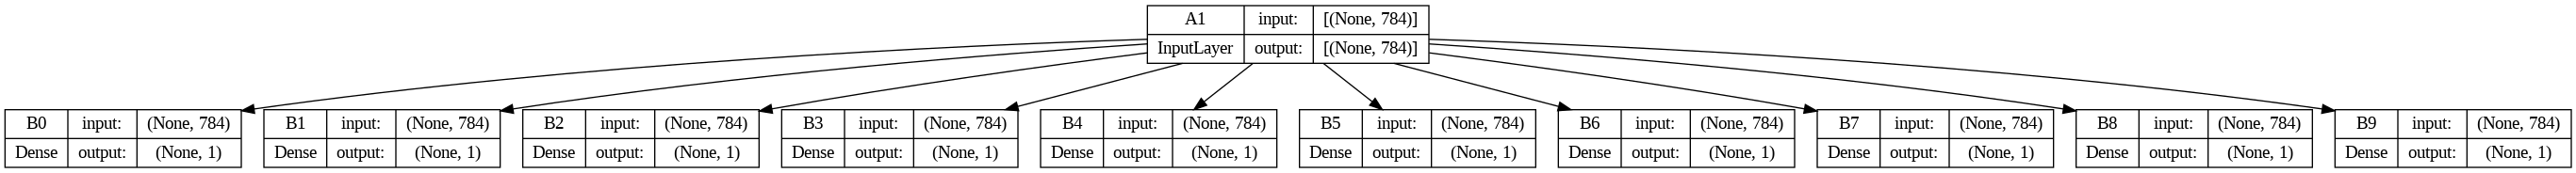

In [ ]:
# Plot the model
model_file = resultsdir.joinpath("shallow_instar.png")
plot_model(merged, to_file=model_file,show_shapes=True)

# Experiments

Now that we have our data, function definitions, and models, we can explore how the models behave.

## Test an input into the model

First, we will verify the basic functionality of the network.
With a random sample, we will see the structure of the output of the network, the winning nodes, and how the network is altered when we deactivate other nodes.

In [ ]:
# Complement-coded
# sample = tf.ones((1, 2*dim**2))
# Un-complement-coded (one sample, expanded image as a 1-D vector)
sample = tf.ones((1, dim**2))
y = merged(sample)
print("y is:" + str(y))
print("max y is:" + str(max(y)))

# Winning index
index = tf.math.argmax(y)[0][0]
print("Index is: " + str(index))
print("Output at index is: " + str(y[index]))

# Winning node name
layer_name = 'B'+str(int(index))
print("Winning node is: " + layer_name)
# Set winner to trainable
activate_one_node(merged, index)
print("layer.trainable for each layer:")
check_trainable(merged)

# Show the difference of this prediction from full activation
print("Loss is:" + str(1-y[index]))

y is:[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.70099807]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.32632813]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6088272]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.252879]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.75195134]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.72623855]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.97881263]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.74883074]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.15774786]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6456106]], dtype=float32)>]
max y is:tf.Tensor([[0.97881263]], shape=(1, 1), dtype=float32)
Index is: tf.Tensor(6, shape=(), dtype=int64)
Output at index is: tf.Tenso

## Test the GradientTape

Next, we will test the functionality of the tensorflow GradientTape object.
This is because we will use it later in our custom training loop.

Winning index: 6
Loss: tf.Tensor(0.021187365, shape=(), dtype=float32)
Trainable variables: 2
Trainable weights: 2
Non-trainable weights: 18
Number of grads: 2
Number of grads in top: 784


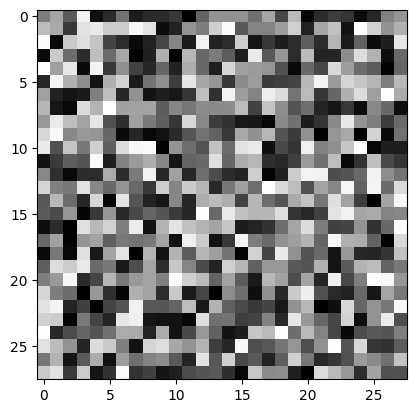

In [ ]:
# Make the head nodes trainable again
activate_nodes(merged)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(sample)
    pred = merged(sample)
    # Get the index of the winning node
    index = tf.math.argmax(pred)[0][0]
    activate_one_node(merged, int(index))
    total_loss = 1 - pred[index][0][0]
    # expected_loss = 1 - pred[index][0][0] + pred[index][0][0] - 0.001
    # expected_loss = tf.Variable(0.0)
    # tape.watch(expected_loss)
grads = tape.gradient(total_loss, merged.trainable_variables)
print("Winning index: " + str(int(index)))
print("Loss: " + str(total_loss))
print("Trainable variables: " + str(len(merged.trainable_variables)))
print("Trainable weights: " + str(len(merged.trainable_weights)))
print("Non-trainable weights: " + str(len(merged.non_trainable_weights)))
print("Number of grads: " + str(len(grads)))
print("Number of grads in top: " + str(len(grads[0])))

# Get the gradient wrt the sample
expected_grads = tape.gradient(total_loss, sample)
expected_grads = expected_grads.numpy()
f_min, f_max = expected_grads.min(), expected_grads.max()
expected_grads = (expected_grads - f_min) / (f_max - f_min)
square_grads = np.reshape(expected_grads, (dim, dim))
plt.figure()
plt.imshow(square_grads, cmap='gray')

In addition to visualizing the gradients with respect to the sample in this single layer, we can visualize the weights themselves.

(<Figure size 960x720 with 1 Axes>, <Axes: >)

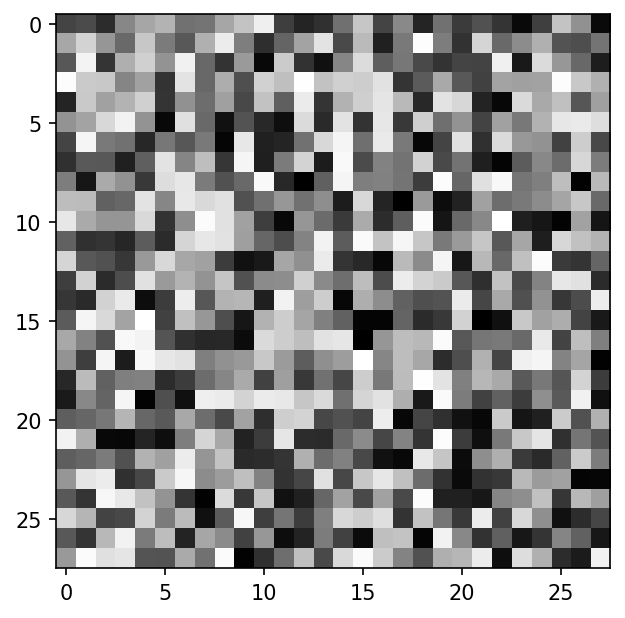

In [ ]:
visualize_weights(merged, 4)

To no great surprise, these weights are the same as the gradients.
This is expected in the single layer case and with a sigmoidal activation function, but it is good to verify the functionality of the GradientTape in this way to know that the gradients being assigned by the given loss in our custom loop with single-node output layers are correct.
Again, this is important in the development of our custom training loop later.

## Check the difference between the input grads and weights

To the same end, we can visualize the difference between these weights and gradients to verify that they are the same to working precision.

1.0000001
0.52804923
1.0


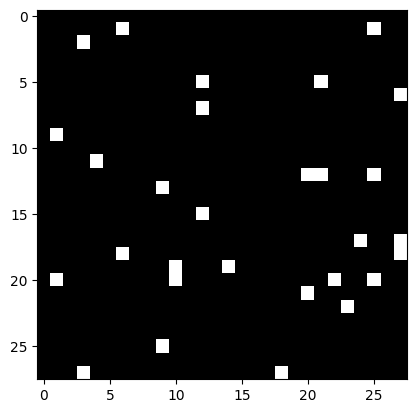

In [ ]:
# Get and normalize the weights
weights, biases = merged.layers[index+1].get_weights()
weights = get_normalized_weights(weights)
square_weights = np.reshape(weights, (dim, dim))
diff = square_weights + square_grads
print(np.max(diff))
print(np.average(weights))
print(np.average(diff))
plt.figure()
plt.imshow(diff, cmap='gray')

## Train Shallow Supervised Network

In [ ]:
# Single training step for a supervised example, using tf.function and tf for under-the-hood optimization (10x faster)
def train_step(model, x, label):
    # Begin computing gradients
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        # Get the predictions
        pred = model(x)
        # Get the index of the winning node
        # index = tf.math.argmax(pred)[0][0]
        # Turn off learning in the top nodes aside from the label
        index = label
        activate_one_node(model, index)
        # print(tf.gather(pred, index)[0][0])
        # Loss is the L1 distance from "full" activation
        total_loss = tf.constant(1.0)-tf.gather(pred, index)[0][0]
    # Compute the gradient wrt the trainable variables
    grads = tape.gradient(total_loss, model.trainable_variables)
    # Apply the optimizer
    model.optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Return the loss
    return total_loss

# Define the fast function as the step function at first
train_step_fast = train_step

# Top method to train the network with supervised labels
def train_supervised(model, train, test, epochs=1, batch_lim=60000):
    # Make the head nodes trainable again
    activate_nodes(model)

    # Iterate over every epoch
    for epoch in range(epochs):
        # Print the epoch progress message
        print("\nEpoch {}/{}".format(epoch+1, epochs))
        # Create the progress bar
        n_samples = tf.data.experimental.cardinality(train).numpy()*128
        pb_e = tf.keras.utils.Progbar(n_samples, stateful_metrics=['loss'])
        # Iterate over all batches
        for batch, (imgs, labels) in enumerate(train):
            # Iterate over every image and label
            for img, label in zip(imgs, labels):
                # Expand the image dim becuase we are using one image at a time
                x = tf.expand_dims(img, axis=0)
                # Do one training step
                total_loss = train_step_fast(model, x, label)
                # Update the progress bar
                pb_e.add(1, values=[('loss', total_loss)])
                # Make the head nodes trainable again
                activate_nodes(model)
            # If we have hit the batch limit, then stop
            if batch > batch_lim:
                break

# Run the training loop for one batch without the fast function because Tensorflow is weird
# It actually isn't weird, but the special graph formulation that I have makes it so that
# Tensorflow cannot do some inferences that are necessary to setup a fast static graph
# without a few iterations using "eager execution".
train_supervised(merged, ds_train, ds_test, batch_lim = 1)

# Redefine the method as a static graph
train_step_fast = tf.function(train_step)

# Train the shallow network in supervised mode
train_supervised(merged, ds_train, ds_test)


Epoch 1/1
    1/60032 [..............................] - ETA: 156:42:39 - loss: 0.4396

KeyError: ignored

After training, we can visualize the shallow network's weights to see the prototypes that it developed during training

In [ ]:
visualize_all_weights(merged)
plt.savefig(resultsdir.joinpath("prototypes_shallow.png"))

Let's look at one of the prototypes up close to see where it expects activated pixels for this class to be.

In [ ]:
# Visualize the zero up close
visualize_weights(merged, 0)
plt.savefig(resultsdir.joinpath("zero_shallow.png"))

We can also test to see the performance after training

In [ ]:
# Method for testing supervised networks
def test_supervised(model, test):
    # Make the head nodes trainable again
    activate_nodes(model)
    # Create the progress bar
    n_samples = tf.data.experimental.cardinality(test).numpy()
    pb_e = tf.keras.utils.Progbar(n_samples, stateful_metrics=['accuracy'])

    m = tf.keras.metrics.Accuracy()

    # Iterate over all batches
    for batch, (imgs, labels) in enumerate(test):
        preds = model.predict(imgs)
        indices = tf.math.argmax(preds, axis=0)
        m.update_state(indices, labels)
        # Update the progress bar
        pb_e.add(1, values=[
            ('accuracy', m.result())
        ])
    return m.result().numpy()

result = test_supervised(merged, ds_test)
print("\nAccuracy:", str(result))

As expected, this network performs much better than random on this high-dimensional dataset, but it certainly does not perform as well as we would wish.
Still, this is not so bad for a single epoch through all the data.

## Make a deeper network

Now we can create a deep instar network and see how it performs using the same training rules as above.

In [ ]:
# Create deep instar
merged_deep = get_deep_instar()

model_file = resultsdir.joinpath("deep_instar.png")
plot_model(merged_deep, to_file=model_file, show_shapes=True)

In [ ]:
# Just as before, run for one iteration with eager execution
train_step_fast = train_step
train_supervised(merged_deep, ds_train, ds_test, batch_lim = 1)

# Redefine the method as a static graph
train_step_fast = tf.function(train_step)

# Train the shallow network in supervised mode
train_supervised(merged_deep, ds_train, ds_test)

After training, we will once again test the network's accuracy because we trained it in supervised mode.

In [ ]:
result = test_supervised(merged_deep, ds_test)
print("\nAccuracy:", str(result))

Already, adding a second layer to the network has skyrocketed the performance from before.
This was somewhat expected because of how high-dimensional input spaces can be transformed into linearly separable spaces when using multiple layers.
However, this result is still a great surprise because of how we used a deep competitive network formulation with a single pass through the data rather than using a batch-optimized multilayer perceptron or CNN.